<a href="https://colab.research.google.com/github/MrXisOnline/data-exploration/blob/main/Programming_Languages_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [2]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [36]:
df = pd.read_csv("QueryResults.csv")

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [37]:
print(df.head())
print(df.tail())

                     m     TagName  Post
0  2008-07-01 00:00:00          c#     3
1  2008-08-01 00:00:00    assembly     8
2  2008-08-01 00:00:00  javascript   162
3  2008-08-01 00:00:00           c    85
4  2008-08-01 00:00:00      python   124
                        m TagName  Post
1986  2020-07-01 00:00:00       r  5694
1987  2020-07-01 00:00:00      go   743
1988  2020-07-01 00:00:00    ruby   775
1989  2020-07-01 00:00:00    perl   182
1990  2020-07-01 00:00:00   swift  3607


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [ ]:
df.shape

(1991, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [ ]:
df.count()

m             1991
TagName       1991
Unnamed: 2    1991
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [5]:
snt = df.groupby("TagName").sum()
print(snt)
snt.loc[snt.idxmax()]

            Unnamed: 2
TagName               
assembly         34852
c               336042
c#             1423530
c++             684210
delphi           46212
go               47499
java           1696403
javascript     2056510
perl             65286
php            1361988
python         1496210
r               356799
ruby            214582
swift           273055


,Unnamed: 2
TagName,
javascript,2056510


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [ ]:
snm = df.groupby("TagName").count()
print(snm)
snm.loc[snm.idxmin()]

              m  Unnamed: 2
TagName                    
assembly    144         144
c           144         144
c#          145         145
c++         144         144
delphi      144         144
go          129         129
java        144         144
javascript  144         144
perl        144         144
php         144         144
python      144         144
r           142         142
ruby        144         144
swift       135         135


,m,Unnamed: 2
TagName,,
go,129,129
go,129,129


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [38]:
date = pd.to_datetime(df["m"])

In [39]:
df.insert(1, "Date", date)

In [43]:
del df["m"]
df

,Date,TagName,Post
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124
...,...,...,...
1986,2020-07-01,r,5694
1987,2020-07-01,go,743
1988,2020-07-01,ruby,775
1989,2020-07-01,perl,182


## Data Manipulation



In [49]:
reshaped_df = df.pivot(index="Date",columns="TagName",values="Post")

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [50]:
reshaped_df.shape

(145, 14)

In [51]:
print(reshaped_df.columns)

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TagName')


In [61]:
print(reshaped_df.head())

TagName     assembly      c      c#    c++  ...  python    r   ruby  swift
Date                                        ...                           
2008-07-01       0.0    0.0     3.0    0.0  ...     0.0  0.0    0.0    0.0
2008-08-01       8.0   85.0   511.0  164.0  ...   124.0  0.0   73.0    0.0
2008-09-01      28.0  321.0  1649.0  755.0  ...   542.0  6.0  290.0    0.0
2008-10-01      15.0  303.0  1989.0  811.0  ...   510.0  0.0  249.0    0.0
2008-11-01      17.0  259.0  1730.0  735.0  ...   452.0  1.0  160.0    0.0

[5 rows x 14 columns]


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [53]:
reshaped_df.count()

TagName
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [54]:
reshaped_df.fillna(0, inplace=True)

In [55]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [14]:
from matplotlib import pyplot as plt

In [73]:
dates = list(reshaped_df.index)


In [74]:
python = list(reshaped_df["python"])
java = list(reshaped_df["java"])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

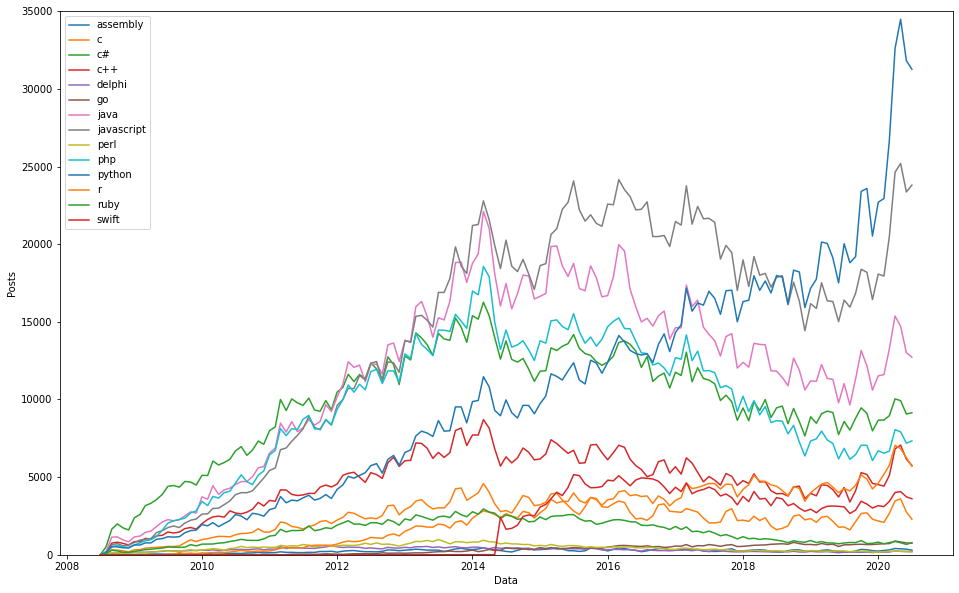

In [90]:
plt.figure(figsize=(16,10))
plt.ylim(0,35000)
for col in reshaped_df.columns:
    plt.plot(list(reshaped_df.index), list(reshaped_df[col]), label=reshaped_df[col].name)
plt.xlabel("Data")
plt.ylabel("Posts")
plt.legend()

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

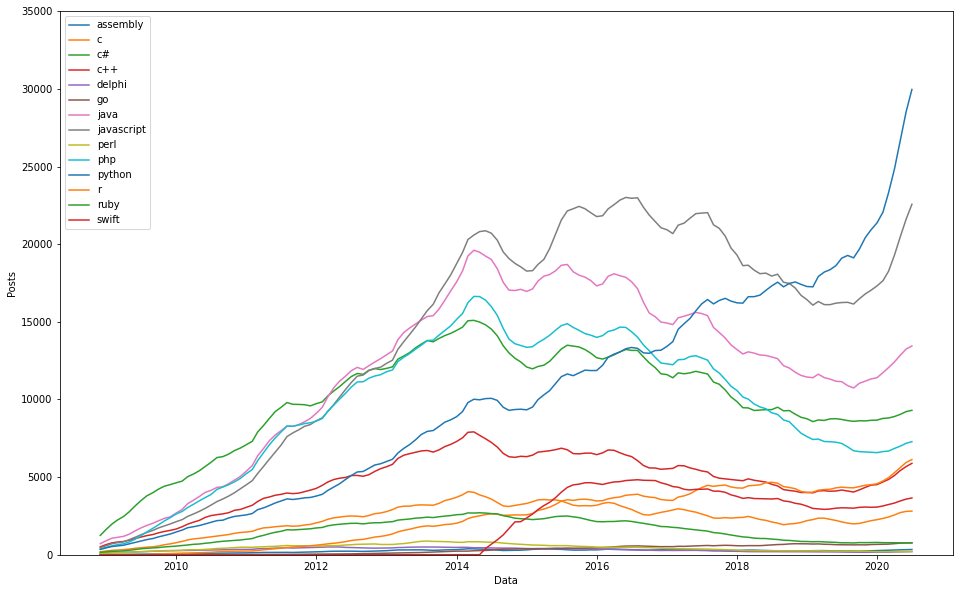

In [97]:
roll_df = reshaped_df.rolling(window=6).mean()
# roll_df
plt.figure(figsize=(16,10))
plt.ylim(0,35000)
for col in reshaped_df.columns:
    plt.plot(list(roll_df.index), list(roll_df[col]), label=roll_df[col].name)
plt.xlabel("Data")
plt.ylabel("Posts")
plt.legend()